In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from scipy.interpolate import interp1d
from utils_CR import CR

# DATA EXTRACTION

In [2]:
FILE = 'C:/Users/pedro/OneDrive/Escritorio/run_2D_Combined-App_Winkler_spectrum.fits.gz'
print(FILE)

hdulist = fits.open(FILE) 
#hdulist.info() 
prihdr = hdulist[0].header  # the primary header 
n_ext  = len(hdulist)


table_hdu    = hdulist[0]              
table_header = table_hdu.header     # header attribute of TABLE 
print(table_header['zmin'], table_header['zmax'], table_header['rmin'], table_header['rmax'], table_header['izsun'], 
      table_header['irsun'], table_header['dimz'], table_header['dimr'], table_header['robs'], table_header['zobs'])

emin   = table_header['ekmin']
ek_fac = table_header['ekin_fac']
dimE   = table_header['dimE'] 

E = [emin*(ek_fac**i) for i in range(0,dimE)]
E = np.array(E)

table_H1_P, table_H1_S, table_H2, table_H3, table_He4, table_He3, table_C12, table_C13, table_C14, table_N14, table_N15, table_O16, table_O17, table_O18, table_Ne, table_Mg, table_Si = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
table_Li6, table_Li7, table_Be7, table_Be9, table_Be10, table_B10, table_B11 = [], [], [], [], [], [], []
table_F19, table_F18 = [], []
table_apro_S, table_apro_P = [], []
for i in range(1,n_ext): #points in the list         

    ## Main CRs
    if hdulist[i].header['A'] == 12 and hdulist[i].header['Z_'] == 6 :
        table_C12.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 13 and hdulist[i].header['Z_'] == 6 :
        table_C13.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 14 and hdulist[i].header['Z_'] == 6 :
        table_C14.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 14 and hdulist[i].header['Z_'] == 7 :
        table_N14.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 15 and hdulist[i].header['Z_'] == 7 :
        table_N15.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 16 and hdulist[i].header['Z_'] == 8 :
        table_O16.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 17 and hdulist[i].header['Z_'] == 8 :
        table_O17.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 18 and hdulist[i].header['Z_'] == 8 :
        table_O18.append(hdulist[i].data)

    elif hdulist[i].header['A'] == 20 and hdulist[i].header['Z_'] == 10:
        table_Ne.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 24 and hdulist[i].header['Z_'] == 12:
        table_Mg.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 28 and hdulist[i].header['Z_'] == 14:
        table_Si.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
        table_H1_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
        table_H1_S.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
        table_H2.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
        table_H3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
        table_He4.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
        table_He3.append(hdulist[i].data)
        
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == -1 and hdulist[i].header['SEC'] == 0 :
        table_apro_P.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == -1  and hdulist[i].header['SEC'] == 1:
        table_apro_S.append(hdulist[i].data)
 
    ## Fluorine
    elif hdulist[i].header['A'] == 19 and hdulist[i].header['Z_'] == 9 :
        table_F19.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 18 and hdulist[i].header['Z_'] == 9 :
        table_F18.append(hdulist[i].data)
        
    ## LiBeB group
    elif hdulist[i].header['A'] == 10 and hdulist[i].header['Z_'] == 5 :
        table_B10.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 11 and hdulist[i].header['Z_'] == 5 :
        table_B11.append(hdulist[i].data)
            
    elif hdulist[i].header['A'] == 7 and hdulist[i].header['Z_'] == 4 :
        table_Be7.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 9 and hdulist[i].header['Z_'] == 4 :
        table_Be9.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 10 and hdulist[i].header['Z_'] == 4 :
        table_Be10.append(hdulist[i].data)
            
    elif hdulist[i].header['A'] == 6 and hdulist[i].header['Z_'] == 3 :
        table_Li6.append(hdulist[i].data)
    elif hdulist[i].header['A'] == 7 and hdulist[i].header['Z_'] == 3 :
        table_Li7.append(hdulist[i].data)
        

table_H1 = np.array(table_H1_P + table_H1_S)
table_Ap = np.array(table_apro_P + table_apro_S)

C:/Users/pedro/OneDrive/Escritorio/run_2D_Combined-App_Winkler_spectrum.fits.gz
-6.07 6.07 0.0 20.0 40 33 81 81 8.3 0.0


In [5]:
phi_ams = 0.61  ## Fisk potential adopted to make the plots 
phi_neg = 0.9
phi_App = 0.58 

#Scale factors accounting for renormalization of the cross sections parametrizations
Ap_sc = 1.1 
B_sc = 0.95 
Be_sc = 0.90
Li_sc = 0.89
F_sc = 0.75

#params for the plots
widths = [1]
heights = [2.8,1.]
gs_kw = dict(width_ratios=widths, height_ratios=heights)

## For Voyager data
def voyerr(a, b, da, db):
    if ((type(a) != np.ndarray) or (type(b) != np.ndarray) or 
        (type(da) != np.ndarray) or (type(db) != np.ndarray)):
        print("Error, the Fluxes (Energies) and errFluxes (ErrEnergies) must be an array")
    return np.sqrt((da/b)**2 + (-a*db/b**2)**2)

# He & H

In [4]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/prot_AMS_2011-2013.dat'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxp = (fluxp_low + fluxp_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/He_AMS_2011-2013.dat'
EmeanHe, EmeanHe_low, EmeanHe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxHe, fluxHe_low, fluxHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxHe = (fluxHe_low + fluxHe_up)/2

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


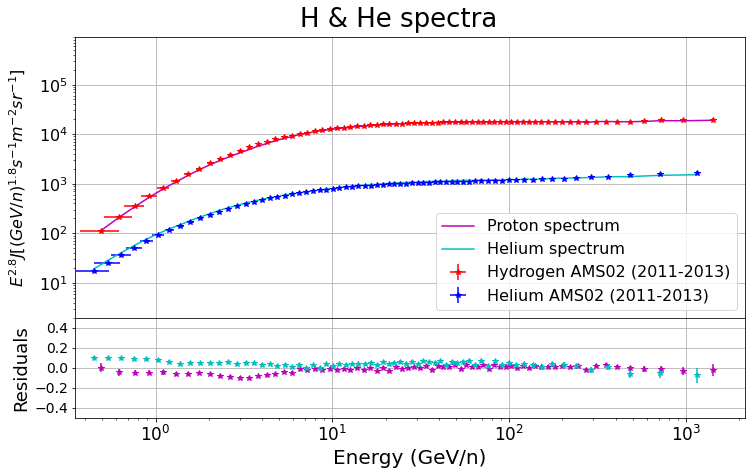

In [5]:
slope = 2.8

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("H & He spectra", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], fmt= '*r', label = "Hydrogen AMS02 (2011-2013)") #Real data

frame1.errorbar(EmeanHe, fluxHe*np.power(EmeanHe, slope), xerr = [(EmeanHe-EmeanHe_low)/EmeanHe, (EmeanHe_up-EmeanHe)/EmeanHe], yerr = [fluxHe_low*np.power(EmeanHe, slope), fluxHe_up*np.power(EmeanHe, slope)], fmt= '*b', label = "Helium AMS02 (2011-2013)") #Real data

H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.01))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.01))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.01))

mod0 = H1 + H2 + H3

frame1.plot(Emeanp, mod0*(Emeanp**slope), "m-", label='Proton spectrum')

He3 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams-0.01))
He4 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams-0.01))

mod1 = He4 + He3

frame1.plot(EmeanHe, mod1*(EmeanHe**slope), "c-", label='Helium spectrum')


frame1.set_ylabel(r"$E^{2.8} J [(GeV/n)^{1.8} s^{-1} m^{-2} sr^{-1}]$", fontsize = 16, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=16)
frame1.grid()
frame1.set_ylim(bottom = 2, top = 9e5)
frame1.set_xlim(left = 0.35)#, right = 2000)
frame1.legend(fontsize =16, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxp)
frame2.errorbar(Emeanp, diff/mod0, yerr = [(fluxp_up/fluxp), (fluxp_low/fluxp)],  fmt= "m*")

diff = np.array(mod1-fluxHe)
frame2.errorbar(EmeanHe, diff/mod1, yerr = [(fluxHe_up/fluxHe), (fluxHe_low/fluxHe)], fmt= "c*")


frame2.set_ylabel("Residuals", fontsize = 18)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 20)
frame2.set_xlim(left = 0.35)#, right = 1800)
frame2.grid()
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
frame2.set_ylim(bottom = -0.5, top = 0.5)
#frame2.legend(ncol = 4, loc = 0) #1 is upper right
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_spectrum.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_spectrum.pdf')
plt.show()
plt.close()

In [6]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Voyager1_2012_Proton.dat'
EmeanVp, EmeanVp_low, EmeanVp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxVp, fluxVp_low, fluxVp_up = np.loadtxt(data,skiprows=0,usecols=(3, 8, 9), unpack=True)
errfluxVp = (fluxVp_low + fluxVp_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Voyager_He_2012.dat'
EmeanVHe, EmeanVHe_left, EmeanVHe_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxVHe, fluxVHe_low, fluxVHe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxVHe = (fluxVHe_low + fluxVHe_up)/2

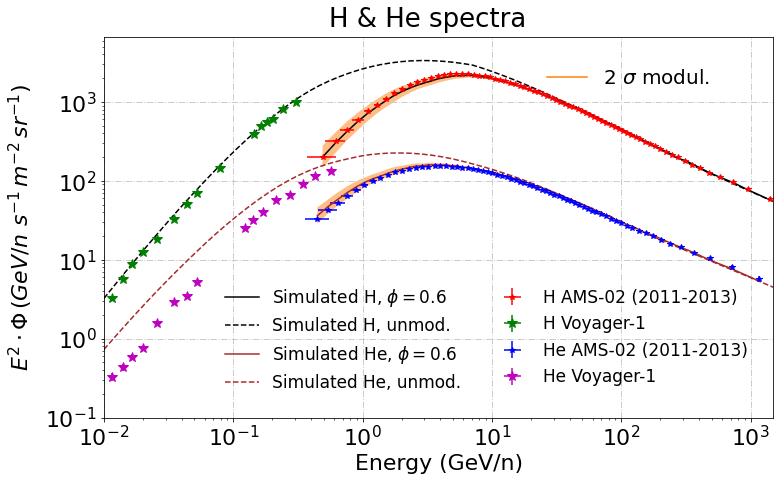

In [7]:
sloppe = 2.

fig1 = plt.figure(figsize=(12,7))
fig1.suptitle("H & He spectra", fontsize = 26, y=0.94)
plt.yscale('log')
plt.xscale('log')

plt.errorbar(Emeanp, fluxp*Emeanp**sloppe, yerr = [fluxp_low*Emeanp**2, fluxp_up*Emeanp**sloppe], xerr = [(Emeanp - Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], fmt='*r', label = r"H AMS-02 (2011-2013)") #Real data
plt.errorbar(EmeanVp, fluxVp*np.power(EmeanVp, sloppe), xerr = [(EmeanVp-EmeanVp_low)/EmeanVp, (EmeanVp_up-EmeanVp)/EmeanVp], yerr = [fluxVp_low*np.power(EmeanVp, sloppe), fluxVp_up*np.power(EmeanVp, sloppe)], fmt= '*g', label = r"H Voyager-1", markersize = 10.)
plt.errorbar(EmeanHe,fluxHe*EmeanHe**sloppe, xerr = [(EmeanHe - EmeanHe_low)/EmeanHe, (EmeanHe_up-EmeanHe)/EmeanHe], yerr = [fluxHe_low*EmeanHe**sloppe, fluxHe_up*EmeanHe**sloppe], fmt='*b', label = r"He AMS-02 (2011-2013)") #Real data
plt.errorbar(EmeanVHe, fluxVHe*np.power(EmeanVHe, sloppe), xerr = [(EmeanVHe-EmeanVHe_left)/EmeanVHe, (EmeanVHe_right-EmeanVHe)/EmeanVHe], yerr = (errfluxVHe/fluxVHe)**sloppe, fmt= '*m', label = r"He Voyager-1", markersize = 10.)

####### Protons #####
H1 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011))
H2 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011))
H3 = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011))
mod1 = (H1 + H2 + H3)
plt.plot(Emeanp, mod1*(Emeanp**sloppe), "k-", label = r"Simulated H, $\phi = {}$".format(str(phi_ams-0.01)))

H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011+0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011+0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011+0.12))
mod1sup  = (H1_ + H2_ + H3_)*(Emeanp**sloppe)
H1_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_ams-0.011-0.12))
H2_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_ams-0.011-0.12))
H3_ = np.interp(Emeanp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_ams-0.011-0.12))
mod1low  = (H1_ + H2_ + H3_)*Emeanp**(sloppe)
plt.fill_between(Emeanp, mod1sup, mod1low, facecolor='C1', alpha=0.5)#, label = r"2 $\sigma$ modul.")

mod0 = (np.array(table_H1)[0] + np.array(table_H2)[0] + np.array(table_H3)[0])*(E**sloppe)
plt.semilogx(E, mod0, "k", linestyle='dashed', label = "Simulated H, unmod.")


####### HELIUM #####
He3 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams-0.01))
He4 = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams-0.01))
plt.plot(EmeanHe, (He4 + He3)*(EmeanHe**sloppe), "brown", linestyle='solid', label = r"Simulated He, $\phi = {}$".format(str(phi_ams-0.01)))

He3_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams-0.01+0.12))
He4_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams-0.01+0.12))
mod1supHe  = (He3_ + He4_)*(EmeanHe**sloppe)
He3_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He3)[0], 2, 3, phi_ams-0.01-0.12))
He4_ = np.interp(EmeanHe, E, CR.modul(E, np.array(table_He4)[0], 2, 4, phi_ams-0.01-0.12))
mod1lowHe  = (He3_ + He4_)*(EmeanHe**sloppe)
plt.fill_between(EmeanHe, mod1supHe, mod1lowHe, facecolor='C1', alpha=0.5)

mod0He = (np.array(table_He3)[0] + np.array(table_He4)[0])*(E**sloppe)
plt.semilogx(E, mod0He, "brown", linestyle='dashed', label = "Simulated He, unmod.")


leg = fig1.legend(labels=[ "2 $\sigma$ modul."], ncol = 1, fontsize = 20, frameon = False, loc = (0.69, 0.8)) 
LH = leg.legendHandles
LH[0].set_color('C1')
plt.legend(prop={'size': 17}, frameon = False, ncol = 2, loc = 'lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel(r"$E^{2} \cdot \Phi \, (GeV$/$n  \,\,s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
plt.xlabel("Energy (GeV/n)", fontsize = 22)
plt.xlim(right = 1.5e3, left = 0.01)
plt.ylim(bottom = 1.e-1)
plt.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_Mod_DRAGON2.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/pHe_Mod_DRAGON2.pdf')
plt.show()
plt.close()

# ANTIPROTONS

In [8]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_AMS02_2018.txt' #Antip_AMS_2011-2015.dat'
Rmeana, Rmeana_left, Emeana_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxa, fluxa_low, fluxa_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)                
errfluxa = (fluxa_low + fluxa_up)/2
EmeanAp, yAp, errAp = CR.Rig_to_En(Rmeana, 1, 1, fluxa, (fluxa_low + fluxa_up)/2)

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/Antip_PAM_JETPlett2013.txt'
EmeanaP, EmeanaP_left, EmeanaP_right = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxaP, fluxaP_low, fluxaP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxaP = (fluxaP_low + fluxaP_up)/2

# #### Aprot/prot DATA
print(r"\n $\hat{p}$/p \n")
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_p_AMS_PRL2018.txt'
RmeanApp, RminApp, RmaxApp = np.loadtxt(data,skiprows=2,usecols=(0,1,2),unpack=True)
fluxApp, fluxApp_low, fluxApp_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
EmeanApp, yApp, errApp = CR.Rig_to_En(RmeanApp, 1, 1, fluxApp, (fluxApp_low + fluxApp_up)/2)

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/prot&Hel/pbar_p_PAM_JETPlett2013.txt'
EmeanrP, EminrP,EmaxrP = np.loadtxt(data,skiprows=2,usecols=(0,1,2),unpack=True)
fluxrP, fluxrP_low, fluxrP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

\n $\hat{p}$/p \n


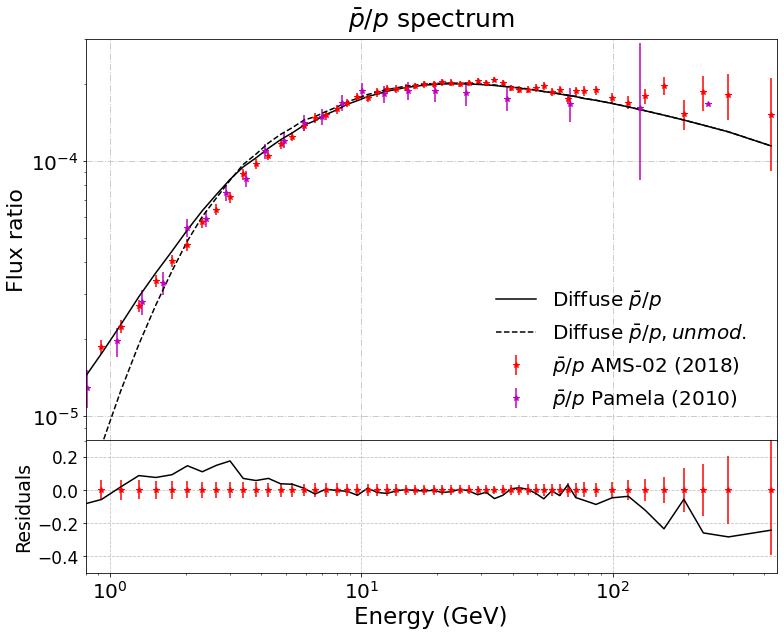

In [10]:
#PLOT
fig1 = plt.figure(figsize=(12., 9.))
fig1.suptitle(r'$\bar{p}/p$ spectrum', fontsize = 25, y = 0.97) #
#Plot Data and model
frame1=fig1.add_axes((.1,.3,.8,.62)) #xmin, ymin, dx, dy
plt.yscale('log')

frame1.errorbar(EmeanApp, yApp, yerr = errApp, fmt='*r', label = r"$\bar{p}/p$ AMS-02 (2018)") #Real data
frame1.errorbar(EmeanrP, fluxrP, yerr = [fluxrP_low, fluxrP_up], fmt='*m', label = r"$\bar{p}/p$ Pamela (2010)") #Real data


H1 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, phi_App))
H2 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, phi_App))
H3 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, phi_App))
AP = np.interp(EmeanApp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = phi_neg))
modApp = Ap_sc*AP/(H1 + H2 + H3)
plt.semilogx(EmeanApp, modApp, 'k', label =  r"Diffuse $\bar{p}/p$")


H1 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H1)[0], 1, 1, 0))
H2 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H2)[0], 1, 2, 0))
H3 = np.interp(EmeanApp, E, CR.modul(E, np.array(table_H3)[0], 1, 3, 0))
AP = np.interp(EmeanApp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, 0, Antip=True, phi_n = 0))
mod0App = Ap_sc*AP/(H1 + H2 + H3)
plt.semilogx(EmeanApp, mod0App, 'k', linestyle = 'dashed', label =  r"Diffuse $\bar{p}/p, unmod.$")

frame1.legend(prop={'size': 20}, frameon = False, loc = 0, fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 22)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)
frame1.set_ylim(bottom = 8e-6, top = 3e-4)
plt.xlim(left = 0.8, right = 450)


frame2 = fig1.add_axes((.1,.096,.8,.205))
plt.xscale('log')

frame2.errorbar(EmeanApp, np.zeros(len(EmeanApp)), yerr = errApp/yApp, fmt = "r*", label = "AMS-02 error-bars")

diff = np.array(modApp-yApp)
frame2.plot(EmeanApp, diff/yApp, "k")

frame2.set_ylim(top = 0.3, bottom = -0.5)
frame2.yaxis.set_tick_params(labelsize = 17)
plt.xlim(left = 0.8, right = 450)
frame2.xaxis.set_tick_params(labelsize = 20)

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV)", fontsize = 23)

frame2.set_yticks([-0.4, -0.2, 0.0, 0.2])
frame2.grid(color= '0.76', linestyle='dashed')#color='w', linestyle='solid')

#plt.legend(ncol = 2, loc = 0, frameon=True, borderpad=1) #1 is upper right
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/App_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/App_CombWinkler.pdf')
plt.show()
plt.close()



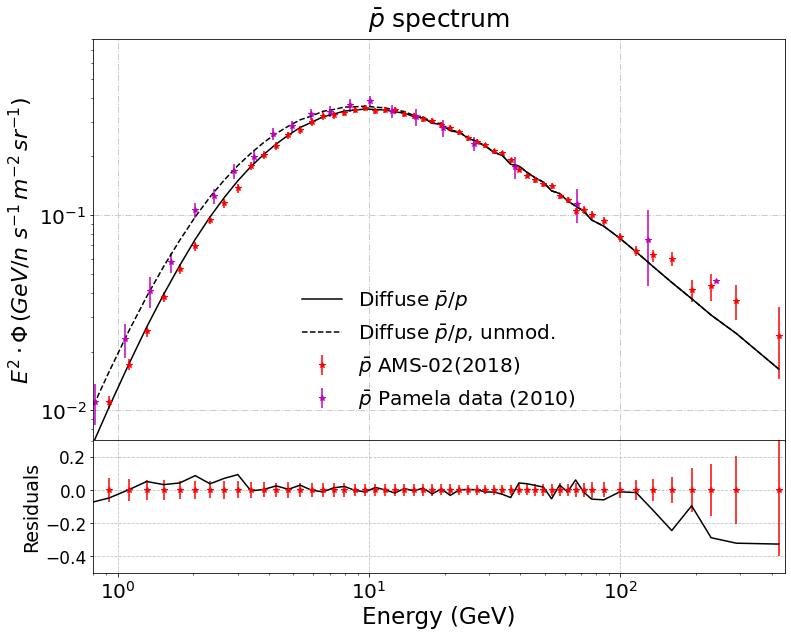

In [11]:
slopp = 2.

#PLOT
fig1 = plt.figure(figsize=(12., 9.))
fig1.suptitle(r'$\bar{p}$ spectrum', fontsize = 25, y = 0.97) #
#Plot Data and model
frame1=fig1.add_axes((.1,.3,.8,.62)) #xmin, ymin, dx, dy
plt.yscale('log')

frame1.errorbar(EmeanAp, yAp*EmeanAp**slopp, yerr = errAp*EmeanAp**slopp, fmt='*r', label = r"$\bar{p}$ AMS-02(2018)") #Real data
frame1.errorbar(EmeanaP, fluxaP*EmeanaP**slopp, yerr = [fluxaP_low*EmeanaP**slopp, fluxaP_up*EmeanaP**slopp], fmt='*m', label = r"$\bar{p}$ Pamela data (2010)") #Real data



modAp = Ap_sc*np.interp(EmeanAp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = phi_neg))
plt.semilogx(EmeanAp, modAp*EmeanAp**slopp, 'k', label =  r"Diffuse $\bar{p}/p$")

mod0Ap = Ap_sc*np.interp(EmeanAp, E, CR.modul(E, np.array(table_Ap)[0], 1, 1, phi_App, Antip=True, phi_n = 0))
plt.semilogx(EmeanAp, mod0Ap*EmeanAp**slopp, 'k', linestyle = 'dashed', label =  r"Diffuse $\bar{p}/p$, unmod.")

frame1.legend(prop={'size': 20}, frameon = False, loc = 0, fancybox=True, framealpha=1, shadow=True, borderpad=1)

if slopp == 2.:
    plt.ylabel(r"$E^{2} \cdot \Phi \, (GeV$/$n  \,\,s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22)
else: 
    raise SystemExit("Change the label for this slopp value ({})".format(slopp))

frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)
frame1.set_ylim(bottom = 7e-3, top = 0.8)
plt.xlim(left = 0.8, right = 450)


frame2 = fig1.add_axes((.1,.096,.8,.205))
plt.xscale('log')

frame2.errorbar(EmeanAp, np.zeros(len(EmeanAp)), yerr = errAp/yAp, fmt = "r*", label = "AMS-02 error-bars")

diff = np.array(modAp-yAp)
frame2.plot(EmeanApp, diff/yAp, "k")

frame2.set_ylim(top = 0.3, bottom = -0.5)
frame2.yaxis.set_tick_params(labelsize = 17)
plt.xlim(left = 0.8, right = 450)
frame2.xaxis.set_tick_params(labelsize = 20)

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV)", fontsize = 23)

frame2.set_yticks([-0.4, -0.2, 0.0, 0.2])

#frame2.set_yticks([0.05, -0.05], minor=True)
#frame2.yaxis.grid(True, which='minor', color = 'chocolate', linestyle='-.', linewidth=1)
frame2.grid(color= '0.76', linestyle='dashed')#color='w', linestyle='solid')

#plt.legend(ncol = 2, loc = 0, frameon=True, borderpad=1) #1 is upper right
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ap_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ap_CombWinkler.pdf')
plt.show()
plt.close()



# MAIN PRIMARIES

## CARBON

In [12]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/C_AMS_PRL2017.txt'
EmeanC, EmeanC_low, EmeanC_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxC, fluxC_low, fluxC_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxC = (fluxC_low + fluxC_up)/2

myZ = 6
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


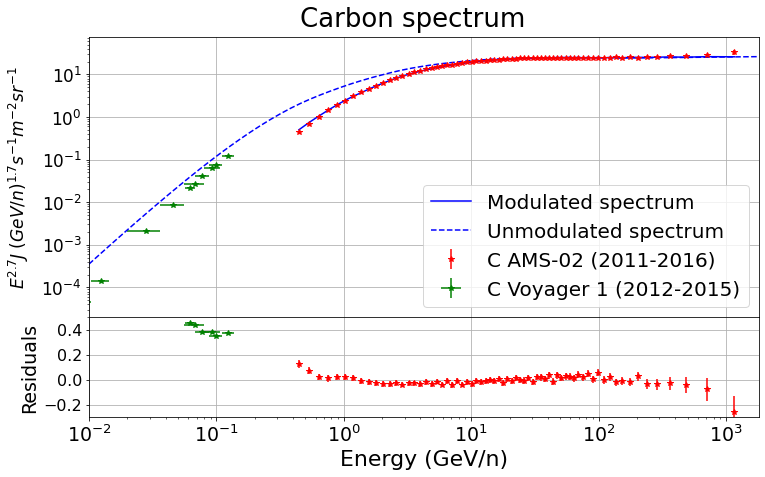

In [13]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Carbon spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanC, fluxC*np.power(EmeanC, 2.7), yerr = [fluxC_low*np.power(EmeanC, 2.7), fluxC_up*np.power(EmeanC, 2.7)], fmt= '*r', label = "C AMS-02 (2011-2016)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr = [Emean_min, Emean_max], yerr = errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "C Voyager 1 (2012-2015)") #Real data
C12 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C12)[0], myZ, 12, phi_ams))
C13 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C13)[0], myZ, 13, phi_ams))
C14 = np.interp(EmeanC, E, CR.modul(E, np.array(table_C14)[0], myZ, 14, phi_ams))

mod0 = C12 + C13 + C14

frame1.plot(EmeanC, mod0*(EmeanC**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxC)
frame2.errorbar(EmeanC, diff/mod0, yerr = [(fluxC_up/fluxC), (fluxC_low/fluxC)],  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")


frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.5)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/C_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/C_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## OXYGEN 

In [14]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/O_AMS_PRL2017.txt' 
EmeanO, EmeanO_low, EmeanO_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxO, fluxO_low, fluxO_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

errfluxO = (fluxO_low + fluxO_up)/2

myZ = 8
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


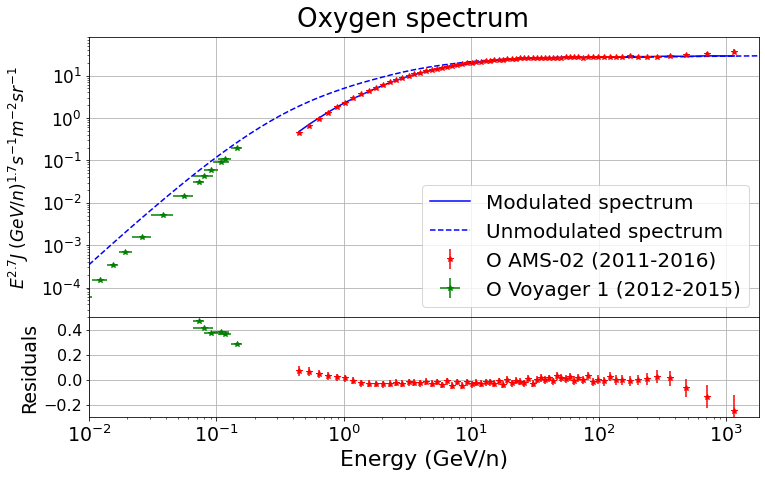

In [15]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Oxygen spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanO, fluxO*np.power(EmeanO, 2.7), yerr=[fluxO_low*np.power(EmeanO, 2.7), fluxO_up*np.power(EmeanO, 2.7)], fmt= '*r', label = "O AMS-02 (2011-2016)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "O Voyager 1 (2012-2015)") #Real data

O16 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O16)[0], myZ, 16, phi_ams))
O17 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O17)[0], myZ, 17, phi_ams))
O18 = np.interp(EmeanO, E, CR.modul(E, np.array(table_O18)[0], myZ, 18, phi_ams))
mod0 = O16 + O17 + O18
frame1.plot(EmeanO, mod0*(EmeanO**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_O16) + np.array(table_O17) + np.array(table_O18))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)
#plt.yticks(fontsize=28)

frame2.set_xscale("log")

diff = np.array(mod0-fluxO)
frame2.errorbar(EmeanO, diff/mod0, yerr = errfluxO/fluxO,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.5)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/O_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/O_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## NITROGEN

In [16]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/N_AMS_PRL2018_rig.txt' 
RmeanN, RmeanN_low, RmeanN_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxN, fluxN_low, fluxN_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

errfluxN = (fluxN_low + fluxN_up)/2

EmeanN, fluxN, errfluxN = CR.Rig_to_En(RmeanN, 14.5, 7, fluxN, errfluxN)


myZ = 7
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


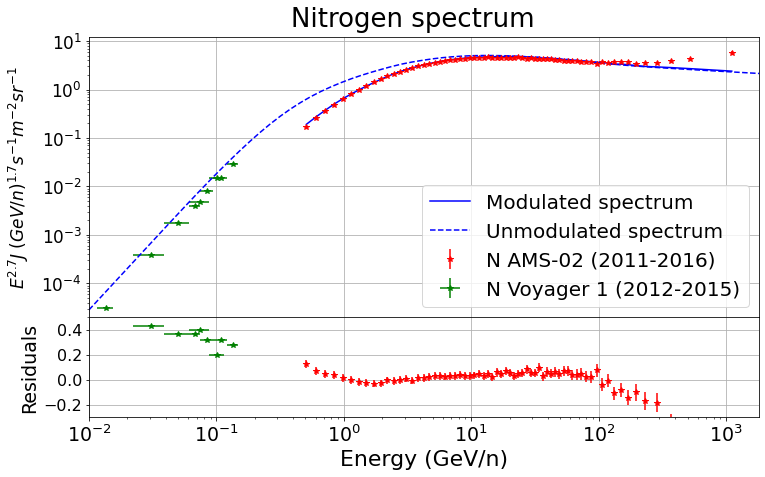

In [17]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Nitrogen spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanN, fluxN*np.power(EmeanN, 2.7), yerr=[fluxN_low*np.power(EmeanN, 2.7), fluxN_up*np.power(EmeanN, 2.7)], fmt= '*r', label = "N AMS-02 (2011-2016)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "N Voyager 1 (2012-2015)") #Real data

N14 = np.interp(EmeanN, E, CR.modul(E, np.array(table_N14)[0], myZ, 14, phi_ams))
N15 = np.interp(EmeanN, E, CR.modul(E, np.array(table_N15)[0], myZ, 15, phi_ams))
mod0 = N14 + N15
frame1.plot(EmeanN, mod0*(EmeanN**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_N14) + np.array(table_N15))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxN)
frame2.errorbar(EmeanN, diff/mod0, yerr = errfluxN/fluxN,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.5)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/N_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/N_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## NEON

In [18]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei2/Ne_AMS_PRL_rig.txt' 
RmeanNe, RmeanNe_low, RmeanNe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxNe1, fluxNe1_low, fluxNe1_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
fluxNe = fluxNe1*(RmeanNe**-2.7)
fluxNe_low = fluxNe1_low*(RmeanNe**-2.7)
fluxNe_up = fluxNe1_up*(RmeanNe**-2.7)

errfluxNe1 = (fluxNe_low + fluxNe_up)/2

EmeanNe, fluxNe, errfluxNe = CR.Rig_to_En(RmeanNe, 20.0, 10, fluxNe, errfluxNe1)

myZ = 10
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


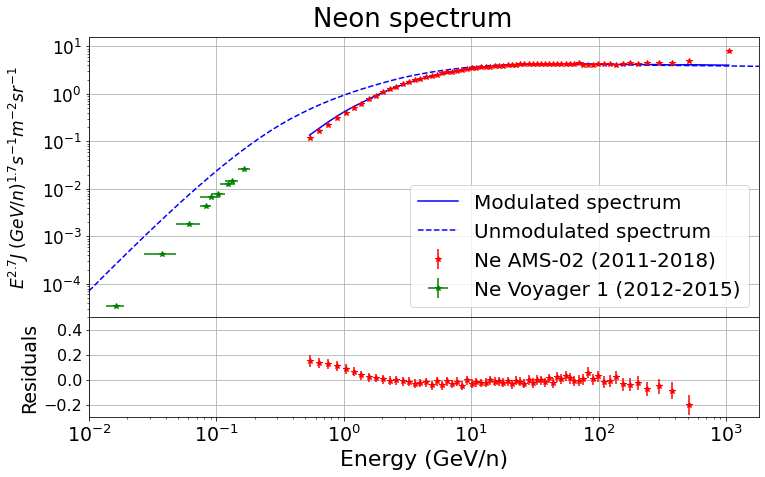

In [19]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Neon spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanNe, fluxNe*np.power(EmeanNe, 2.7), yerr=errfluxNe**2.7, fmt= '*r', label = "Ne AMS-02 (2011-2018)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "Ne Voyager 1 (2012-2015)") #Real data

mod0 = np.interp(EmeanNe, E, CR.modul(E, np.array(table_Ne)[0], myZ, 20, phi_ams))
frame1.plot(EmeanNe, mod0*(EmeanNe**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_Ne))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxNe)
frame2.errorbar(EmeanNe, diff/mod0, yerr = errfluxNe/fluxNe,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.5)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ne_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Ne_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## MAGNESIUM

In [20]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei2/Mg_AMS_PRL_rig.txt' 
RmeanMg, RmeanMg_low, RmeanMg_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxMg1, fluxMg1_low, fluxMg1_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
fluxMg = fluxMg1*(RmeanMg**-2.7)
fluxMg_low = fluxMg1_low*(RmeanMg**-2.7)
fluxMg_up =  fluxMg1_up*(RmeanMg**-2.7)

errfluxMg1 = (fluxMg_low + fluxMg_up)/2

EmeanMg, fluxMg, errfluxMg = CR.Rig_to_En(RmeanMg, 24, 12, fluxMg, errfluxMg1)

myZ = 12
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


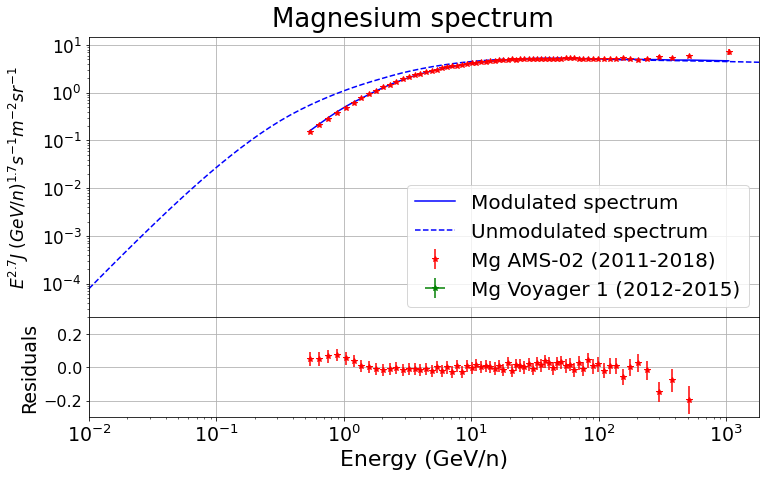

In [21]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Magnesium spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanMg, fluxMg*np.power(EmeanMg, 2.7), yerr=errfluxMg*(EmeanMg**2.7), fmt= '*r', label = "Mg AMS-02 (2011-2018)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "Mg Voyager 1 (2012-2015)") #Real data
mod0 = np.interp(EmeanMg, E, CR.modul(E, np.array(table_Mg)[0], myZ, 24, phi_ams))
frame1.plot(EmeanMg, mod0*(EmeanMg**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_Mg))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxMg)
frame2.errorbar(EmeanMg, diff/mod0, yerr = errfluxMg/fluxMg,  fmt= "r*")

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.3)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Mg_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Mg_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## SILICON

In [22]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei2/Si_AMS_PRL_rig.txt' 
RmeanSi, RmeanSi_low, RmeanSi_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxSi1, fluxSi1_low, fluxSi1_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
fluxSi = fluxSi1*(RmeanSi**-2.7)
fluxSi_low = fluxSi1_low*(RmeanSi**-2.7)
fluxSi_up =  fluxSi1_up*(RmeanSi**-2.7)

errfluxSi1 = (fluxSi_low + fluxSi_up)/2

EmeanSi, fluxSi, errfluxSi = CR.Rig_to_En(RmeanSi, 28, 14, fluxSi, errfluxSi1)

myZ = 14
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


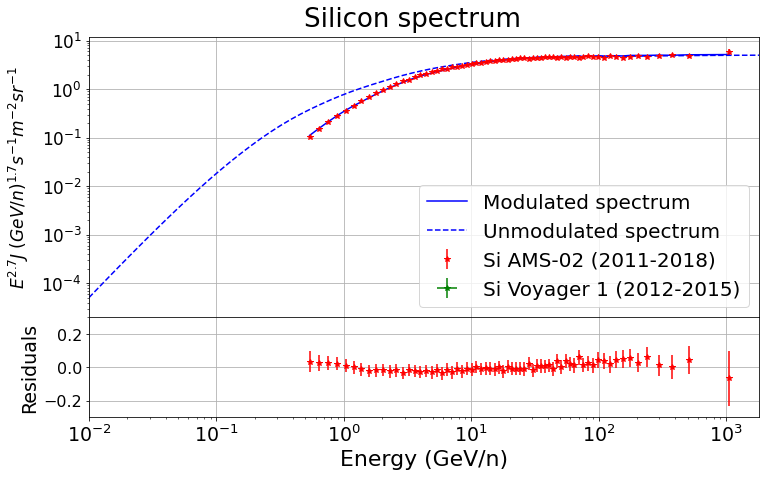

In [23]:
fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Silicon spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanSi, fluxSi*np.power(EmeanSi, 2.7), yerr=errfluxSi*(EmeanSi**2.7), fmt= '*r', label = "Si AMS-02 (2011-2018)") #Real data
frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr=[Emean_min, Emean_max], yerr= errfluxA*np.power(EmeanA, 2.7), fmt= '*g', label = "Si Voyager 1 (2012-2015)") #Real data
mod0 = np.interp(EmeanSi, E, CR.modul(E, np.array(table_Si)[0], myZ, 28, phi_ams))
frame1.plot(EmeanSi, mod0*(EmeanSi**2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, (np.array(table_Si))[0])
frame1.plot(E, mod1*(E**2.7), "b--", label='Unmodulated spectrum')

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
frame1.grid()
frame1.set_ylim(2*1e-5)
frame1.set_xlim(left = 0.001, right = 2000)
frame1.legend(fontsize = 20, loc = 4)

frame2.set_xscale("log")

diff = np.array(mod0-fluxSi)
frame2.errorbar(EmeanSi, 0.65*diff/mod0, yerr = errfluxSi/fluxSi,  fmt= "r*")

frame2.set_ylabel("Residuals", fontsize = 19)
frame2.set_xlabel("Energy (GeV/n)", fontsize = 22)
frame2.set_xlim(left = 0.01, right = 1800)
frame2.grid()
plt.xticks(fontsize=19)
plt.yticks(fontsize=16)
frame2.set_ylim(bottom = -0.3, top = 0.3)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Si_spectrum_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/Si_spectrum_CombWinkler.pdf')
plt.show()
plt.close()

## FLUORINE

In [3]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei2/AMS-F_Rig-2021.txt' 
RmeanF, RmeanF_low, RmeanF_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxF, fluxF_low, fluxF_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)

errfluxF = (fluxF_low + fluxF_up)/2

EmeanF, fluxF, errfluxF = CR.Rig_to_En(RmeanF, 19, 9, fluxF, errfluxF)


myZ = 9
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data, skiprows=4, usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data, skiprows=4, usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z == myZ]
errfluxA = np.sqrt(sys**2 + sig**2)[Z==myZ]
fluxA = 1e3*fluxA[Z==myZ]

Emean_min = (1e-3 * Emean_min[Z==myZ])
Emean_max = (1e-3 * Emean_max[Z==myZ])

Emean_min = EmeanA - Emean_min
Emean_max = Emean_max - EmeanA

EmeanA = EmeanA

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


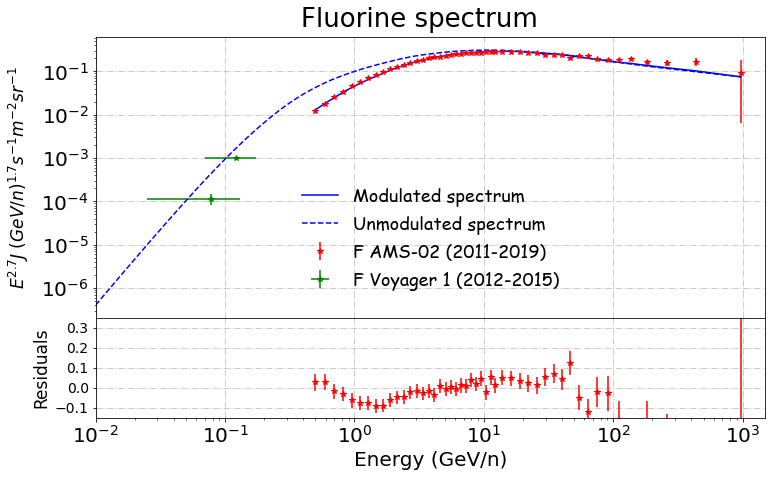

In [6]:
#F PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Fluorine spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanF, fluxF*np.power(EmeanF, 2.7), yerr = errfluxF*np.power(EmeanF, 2.7), fmt='*r', label = "F AMS-02 (2011-2019)") #Real data

frame1.errorbar(EmeanA, fluxA*np.power(EmeanA, 2.7), xerr= [Emean_min, Emean_max], yerr=errfluxA, fmt= '*g', label = "F Voyager 1 (2012-2015)") #Real data

#F18 = np.interp(EmeanF, E, CR.modul(E, np.array(table_F18)[0], 9, 18, phi_ams))
F19 = np.interp(EmeanF, E, CR.modul(E, np.array(table_F19)[0], 9, 19, phi_ams))

mod0 = F_sc*F19 # F18 + F19
frame1.plot(EmeanF, mod0*np.power(EmeanF, 2.7), "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, F_sc*np.array(table_F19)[0])  #(np.array(table_F18) + np.array(table_F19)
frame1.plot(E[E<1e3], mod1[E<1e3]*np.power(E[E<1e3], 2.7), "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

frame1.set_ylabel(r"$E^{2.7} J \,\, (GeV/n)^{1.7} s^{-1} m^{-2} sr^{-1}$", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
#frame1.grid()
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxF)
frame2.errorbar(EmeanF, diff/mod0, yerr = errfluxF/fluxF,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-fluxA)
frame2.errorbar(EmeanA, diff/mod1, yerr = errfluxA/fluxA, xerr = [Emean_min, Emean_max],  fmt= "g*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.35, bottom = -0.15) # -0.35
frame2.set_xlim(right = 1.5e3, left = 0.01)
frame2.set_yticks([-0.1, 0, 0.1, 0.2, 0.3]) # -0.3, -0.2,

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/F_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/F_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

# SECONDARY-TO-PRIMARY RATIOS

## B/C

In [32]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/B_C_ratio_AMS_PRL2018.txt'
EmeanBC = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxBC, fluxBC_low, fluxBC_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxBC = (fluxBC_low + fluxBC_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/B_C_PAM_ApJ2014.txt'
EmeanBCP, EmeanBCP_low, EmeanBCP_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxBCP, fluxBCP_low, fluxBCP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxBCP = (fluxBCP_low + fluxBCP_up)/2


MyZ = 6
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 5
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBC)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)




C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


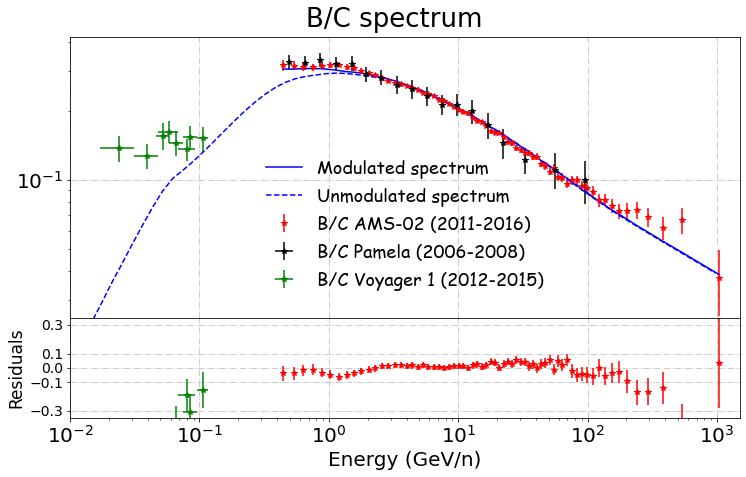

In [33]:
#B/C PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("B/C spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanBC, fluxBC, yerr = [fluxBC_low, fluxBC_up], fmt='*r', label = "B/C AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanBCP, fluxBCP, xerr = [(EmeanBCP-EmeanBCP_low)/EmeanBCP, (EmeanBCP_up-EmeanBCP)/EmeanBCP], yerr = [fluxBCP_low, fluxBCP_up], fmt='*k', label = "B/C Pamela (2006-2008)")

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr= [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "B/C Voyager 1 (2012-2015)") #Real data

B10 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B10)[0], 5, 10, phi_ams))
B11 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_B11)[0], 5, 11, phi_ams))

C12 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C12)[0], 6, 12, phi_ams))
C13 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C13)[0], 6, 13, phi_ams))
C14 = np.interp(EmeanBC, E, CR.modul(E, np.array(table_C14)[0], 6, 14, phi_ams))

mod0 = B_sc*(B10 + B11)/(C12 + C13 + C14)
frame1.plot(EmeanBC, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, B_sc*(np.array(table_B10) + np.array(table_B11))[0]/(np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBC)
frame2.errorbar(EmeanBC, diff/mod0, yerr = errfluxBC/fluxBC,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 2.5e-2)
frame2.set_ylim(top = 0.35, bottom = -0.35)
frame2.set_xlim(right = 1.5e3, left = 0.01)
frame2.set_yticks([-0.3, -0.1, 0, 0.1, 0.3])

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BC_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BC_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## B/O

In [34]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/B_O_ratio_AMS_PRL2018.txt'
EmeanBO = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxBO, fluxBO_low, fluxBO_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxBO = (fluxBO_low + fluxBO_up)/2


MyZ = 8
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 5
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBO)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


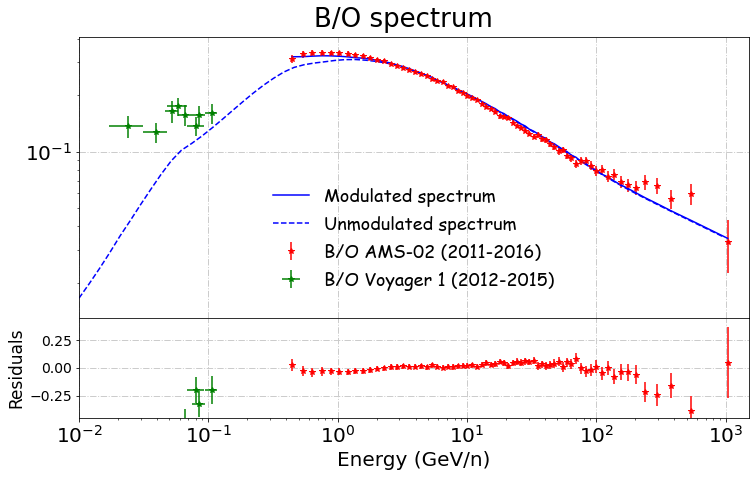

In [35]:
#B/O PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("B/O spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanBO, fluxBO, yerr = [fluxBO_low, fluxBO_up], fmt='*r', label = "B/O AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr = [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "B/O Voyager 1 (2012-2015)") #Real data

B10 = np.interp(EmeanBO, E, CR.modul(E, np.array(table_B10)[0], 5, 10, phi_ams))
B11 = np.interp(EmeanBO, E, CR.modul(E, np.array(table_B11)[0], 5, 11, phi_ams))

O16 = np.interp(EmeanBO, E, CR.modul(E, np.array(table_O16)[0], 8, 16, phi_ams))
O17 = np.interp(EmeanBO, E, CR.modul(E, np.array(table_O17)[0], 8, 17, phi_ams))
O18 = np.interp(EmeanBO, E, CR.modul(E, np.array(table_O18)[0], 8, 18, phi_ams))

mod0 = B_sc*(B10 + B11)/(O16 + O17 + O18)
frame1.plot(EmeanBO, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, B_sc*(np.array(table_B10) + np.array(table_B11))[0]/(np.array(table_O16) + np.array(table_O17) + np.array(table_O18))
[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBO)
frame2.errorbar(EmeanBO, diff/mod0, yerr = errfluxBO/fluxBO,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 1.5e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BO_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BO_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## Be/C

In [36]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/Be_C_ratio_AMS_PRL2018.txt'
EmeanBeC = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxBeC, fluxBeC_low, fluxBeC_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxBeC = (fluxBeC_low + fluxBeC_up)/2


MyZ = 6
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 4
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBeC)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


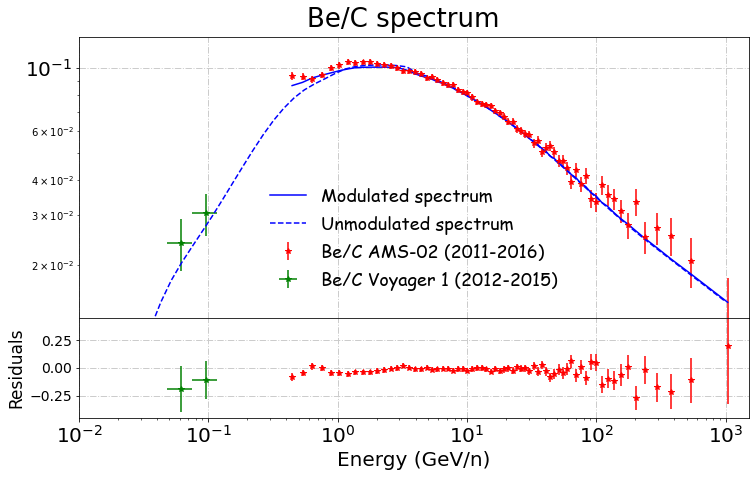

In [37]:
#Be/C PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Be/C spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanBeC, fluxBeC, yerr = [fluxBeC_low, fluxBeC_up], fmt='*r', label = "Be/C AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr = [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "Be/C Voyager 1 (2012-2015)") #Real data

Be7 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_Be7)[0], 4, 7, phi_ams))
Be9 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_Be9)[0], 4, 9, phi_ams))
Be10 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_Be10)[0], 4, 10, phi_ams))

C12 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_C12)[0], 6, 12, phi_ams))
C13 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_C13)[0], 6, 13, phi_ams))
C14 = np.interp(EmeanBeC, E, CR.modul(E, np.array(table_C14)[0], 6, 14, phi_ams))

mod0 = Be_sc*(Be7 + Be9 + Be10)/(C12 + C13 + C14)
frame1.plot(EmeanBeC, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, Be_sc*(np.array(table_Be10) + np.array(table_Be9) + np.array(table_Be7))[0]/(np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBeC)
frame2.errorbar(EmeanBeC, diff/mod0, yerr = errfluxBeC/fluxBeC,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 1.5e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BeC_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BeC_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## Be/O

In [38]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/Be_AMS_PRL2018.txt' # ϕ=564 ± 26 MV
EmeanBe, EmeanBe_low, EmeanBe_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxBe, fluxBe_low, fluxBe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxBe = (fluxBe_low + fluxBe_up)/2

data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/O_AMS_PRL2017.txt' # ϕ=564 ± 26 MV
EmeanO, EmeanO_low, EmeanO_up = np.loadtxt(data,skiprows=0,usecols=(0, 1, 2), unpack=True)
fluxO, fluxO_low, fluxO_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)
errfluxO = (fluxO_low + fluxO_up)/2

fluxO = np.interp(EmeanBe, EmeanO, fluxO)
errfluxO = np.interp(EmeanBe, EmeanO, errfluxO)
fluxBeO = fluxBe/fluxO
errfluxBeO = np.sqrt((errfluxBe/fluxO)**2 + (errfluxO * (fluxBe/(fluxO)**2))**2)
EmeanBeO = EmeanBe


MyZ = 8
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 4
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanBeO)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


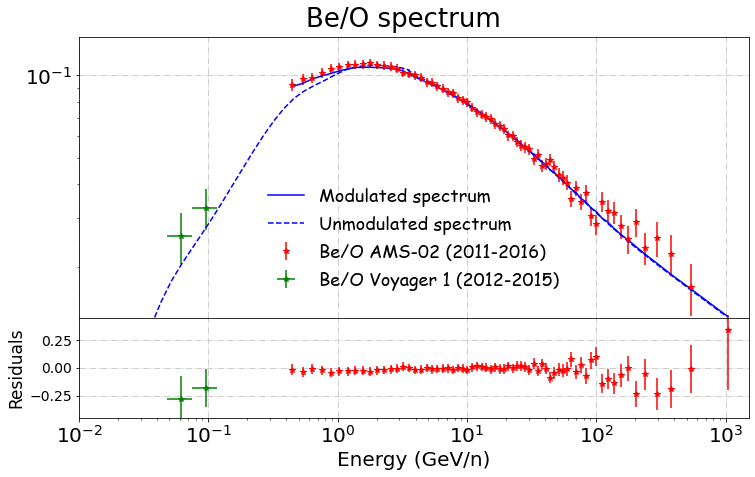

In [39]:
#Be/O PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Be/O spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanBeO, fluxBeO, yerr = errfluxBeO, fmt='*r', label = "Be/O AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr = [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "Be/O Voyager 1 (2012-2015)") #Real data

Be7 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_Be7)[0], 4, 7, phi_ams))
Be9 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_Be9)[0], 4, 9, phi_ams))
Be10 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_Be10)[0], 4, 10, phi_ams))

O16 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_O16)[0], 8, 16, phi_ams))
O17 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_O17)[0], 8, 17, phi_ams))
O18 = np.interp(EmeanBeO, E, CR.modul(E, np.array(table_O18)[0], 8, 18, phi_ams))

mod0 = Be_sc*(Be7 + Be9 + Be10)/(O16 + O17 + O18)
frame1.plot(EmeanBeO, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, Be_sc*(np.array(table_Be10) + np.array(table_Be9) + np.array(table_Be7))[0]/(np.array(table_O16) + np.array(table_O17) + np.array(table_O18))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxBeO)
frame2.errorbar(EmeanBeO, diff/mod0, yerr = errfluxBeO/fluxBeO,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 1.5e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BeO_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/BeO_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## Li/C

In [40]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/Li_C_ratio_AMS_PRL2018.txt'
EmeanLiC = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxLiC, fluxLiC_low, fluxLiC_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxLiC = (fluxLiC_low + fluxLiC_up)/2


MyZ = 6
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 3
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanLiC)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


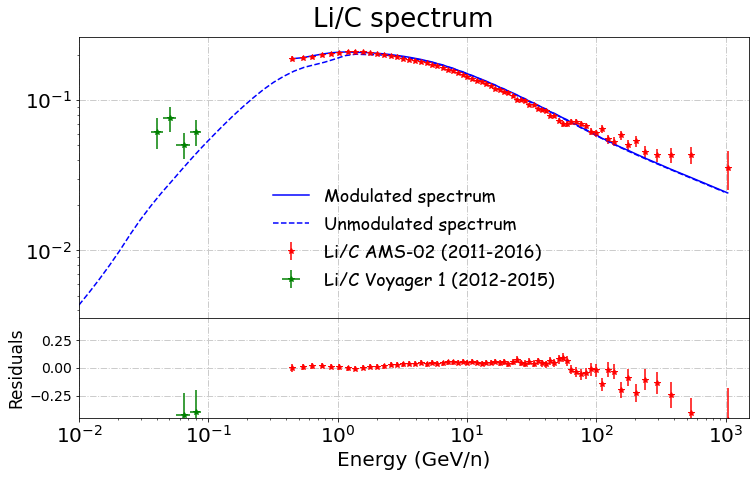

In [41]:
#Li/C PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Li/C spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanLiC, fluxLiC, yerr = [fluxLiC_low, fluxLiC_up], fmt='*r', label = "Li/C AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr = [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "Li/C Voyager 1 (2012-2015)") #Real data

Li6 = np.interp(EmeanLiC, E, CR.modul(E, np.array(table_Li6)[0], 3, 6, phi_ams))
Li7 = np.interp(EmeanLiC, E, CR.modul(E, np.array(table_Li7)[0], 3, 7, phi_ams))

C12 = np.interp(EmeanLiC, E, CR.modul(E, np.array(table_C12)[0], 6, 12, phi_ams))
C13 = np.interp(EmeanLiC, E, CR.modul(E, np.array(table_C13)[0], 6, 13, phi_ams))
C14 = np.interp(EmeanLiC, E, CR.modul(E, np.array(table_C14)[0], 6, 14, phi_ams))

mod0 = Li_sc*(Li6 + Li7)/(C12 + C13 + C14)
frame1.plot(EmeanLiC, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, Li_sc*(np.array(table_Li7) + np.array(table_Li6))[0]/(np.array(table_C12) + np.array(table_C13) + np.array(table_C14))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxLiC)
frame2.errorbar(EmeanLiC, diff/mod0, yerr = errfluxLiC/fluxLiC,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 1.5e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/LiC_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/LiC_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## Li/O

In [42]:
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/nuclei1/Li_O_ratio_AMS_PRL2018.txt'
EmeanLiO = np.loadtxt(data,skiprows=0,usecols=(0,))
fluxLiO, fluxLiO_low, fluxLiO_up = np.loadtxt(data,skiprows=0,usecols=(3,4, 5), unpack=True)
errfluxLiO = (fluxLiO_low + fluxLiO_up)/2


MyZ = 8
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' 
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA2, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA2 = (1e-3*(0.5*(Emean_min + Emean_max)))[Z ==MyZ]

errfluxA2 = (np.sqrt(sys**2 + sig**2))[Z==MyZ]
fluxA2 = 1e3*fluxA2[Z==MyZ]

errfluxA2 = (errfluxA2[EmeanA2 > 0.01])
fluxA2 = fluxA2[EmeanA2>0.01]

Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA2>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA2>0.01]

Emean_minA2 = EmeanA2[EmeanA2>0.01] - Emean_min
Emean_maxA2 = Emean_max - EmeanA2[EmeanA2>0.01] 

EmeanA2 = EmeanA2[EmeanA2>0.01]


MyZ = 3
data = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/BC/apjaa2409t9_ascii.txt' # ϕ=564 ± 26 MV
Z, Emean_min, Emean_max = np.loadtxt(data,skiprows=4,usecols=(0, 1, 2), unpack=True)
fluxA, sig, sys = np.loadtxt(data,skiprows=4,usecols=(3, 4, 5), unpack=True)
EmeanA = (1e-3*(0.5*(Emean_min + Emean_max)))[Z==MyZ]
errfluxA = 1e3*np.sqrt(sys**2 + sig**2)[Z==MyZ]
fluxA = 1e3*fluxA[Z==MyZ]

errfluxA = (errfluxA[EmeanA > 0.01])
fluxA = fluxA[EmeanA>0.01]
Emean_min = (1e-3 * Emean_min[Z==MyZ])[EmeanA>0.01]
Emean_max = (1e-3 * Emean_max[Z==MyZ])[EmeanA>0.01]

Emean_min = EmeanA[EmeanA>0.01] - Emean_min
Emean_max = Emean_max - EmeanA[EmeanA>0.01] 

EmeanA = EmeanA[EmeanA>0.01]
Etot = np.sort(list(EmeanLiO)+ list(EmeanA))

fluxA2_new = np.interp(EmeanA, EmeanA2, fluxA2)
errfluxA2_new = np.interp(EmeanA, EmeanA2, errfluxA2)
EnerrA2 = 0.5*(Emean_minA2 + Emean_maxA2)
errEnA2_new = np.interp(EmeanA, EmeanA2, EnerrA2)

fluxerr = voyerr(fluxA, fluxA2_new, errfluxA, errfluxA2_new)
EnerrA = 0.5*(Emean_min + Emean_max)
Enerr = voyerr(fluxA, fluxA2_new, EnerrA, errEnA2_new)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


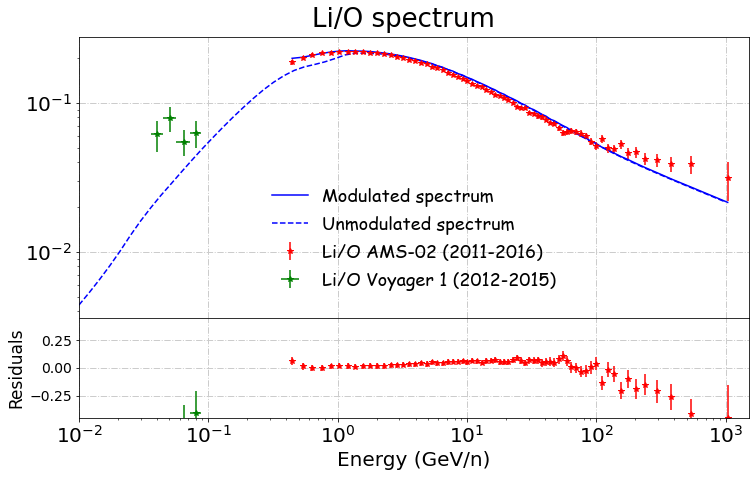

In [43]:
#Li/O PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("Li/O spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanLiO, fluxLiO, yerr = [fluxLiO_low, fluxLiO_up], fmt='*r', label = "Li/O AMS-02 (2011-2016)") #Real data

frame1.errorbar(EmeanA, (fluxA/fluxA2_new), xerr = [Emean_min, Emean_max], yerr=fluxerr, fmt= '*g', label = "Li/O Voyager 1 (2012-2015)") #Real data

Li6 = np.interp(EmeanLiO, E, CR.modul(E, np.array(table_Li6)[0], 3, 6, phi_ams))
Li7 = np.interp(EmeanLiO, E, CR.modul(E, np.array(table_Li7)[0], 3, 7, phi_ams))

O16 = np.interp(EmeanLiO, E, CR.modul(E, np.array(table_O16)[0], 8, 16, phi_ams))
O17 = np.interp(EmeanLiO, E, CR.modul(E, np.array(table_O17)[0], 8, 17, phi_ams))
O18 = np.interp(EmeanLiO, E, CR.modul(E, np.array(table_O18)[0], 8, 18, phi_ams))

mod0 = Li_sc*(Li6 + Li7)/(O16 + O17 + O18)
frame1.plot(EmeanLiO, mod0, "b-", label='Modulated spectrum')

mod1 = np.interp(E, E, Li_sc*(np.array(table_Li7) + np.array(table_Li6))[0]/(np.array(table_O16) + np.array(table_O17) + np.array(table_O18))[0])
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.ylabel("Flux ratio", fontsize = 20)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)

diff = np.array(mod0-fluxLiO)
frame2.errorbar(EmeanLiO, diff/mod0, yerr = errfluxLiO/fluxLiO,  fmt= "r*")

mod1 = np.interp(EmeanA, E, mod1)
diff = np.array(mod1-(fluxA/fluxA2_new))
frame2.errorbar(EmeanA, diff/mod1, yerr = fluxerr/(fluxA/fluxA2_new), xerr = [Emean_min, Emean_max],  fmt= "g*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.45, bottom = -0.45)
frame2.set_xlim(right = 1.5e3, left = 0.01)

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)

plt.savefig('C:/Users/pedro/OneDrive/Escritorio/LiO_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/LiO_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

## F RATIOS

### F/Si

In [44]:
FSi_err = np.sqrt((errfluxF/np.interp(EmeanF, EmeanSi, fluxSi))**2 + (errfluxF * (fluxF/(np.interp(EmeanF, EmeanSi, fluxSi))**2))**2)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


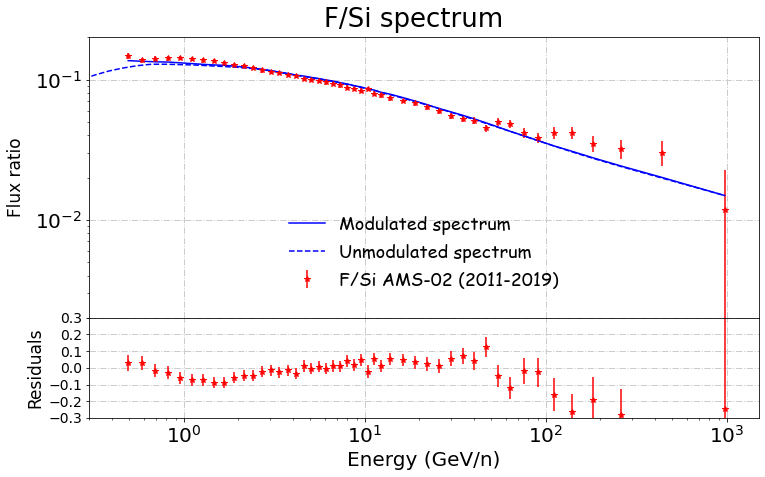

In [45]:
#F/Si PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("F/Si spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanF, fluxF/np.interp(EmeanF, EmeanSi, fluxSi), yerr = FSi_err, fmt='*r', label = "F/Si AMS-02 (2011-2019)") #Real data

F19 = F_sc*np.interp(EmeanF, E, CR.modul(E, np.array(table_F19)[0], 9, 19, phi_ams))

mod0 = F19/np.interp(EmeanF, E, CR.modul(E, np.array(table_Si)[0], 14, 28, phi_ams))
frame1.plot(EmeanF, mod0, "b-", label='Modulated spectrum')

mod1 = F_sc*np.array(table_F19)[0]/(np.array(table_Si))[0]  #(np.array(table_F18) + np.array(table_F19)
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

frame1.set_ylabel(r"Flux ratio", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
#frame1.grid()
frame1.set_xlim(right = 1.5e3, left = 0.3)
frame1.set_ylim(bottom=2.e-3, top = 0.2)
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxF/np.interp(EmeanF, E, CR.modul(E, np.array(table_Si)[0], 14, 28, phi_ams)))
frame2.errorbar(EmeanF, diff/mod0, yerr = FSi_err/(fluxF/np.interp(EmeanF, E, CR.modul(E, np.array(table_Si)[0], 14, 28, phi_ams))),  fmt= "r*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.3, bottom = -0.3) 
frame2.set_xlim(right = 1.5e3, left = 0.3)
frame2.set_yticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]) # 

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FSi_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FSi_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

### F/Mg

In [46]:
FMg_err = np.sqrt((errfluxF/np.interp(EmeanF, EmeanMg, fluxMg))**2 + (errfluxF * (fluxF/(np.interp(EmeanF, EmeanMg, fluxMg))**2))**2)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


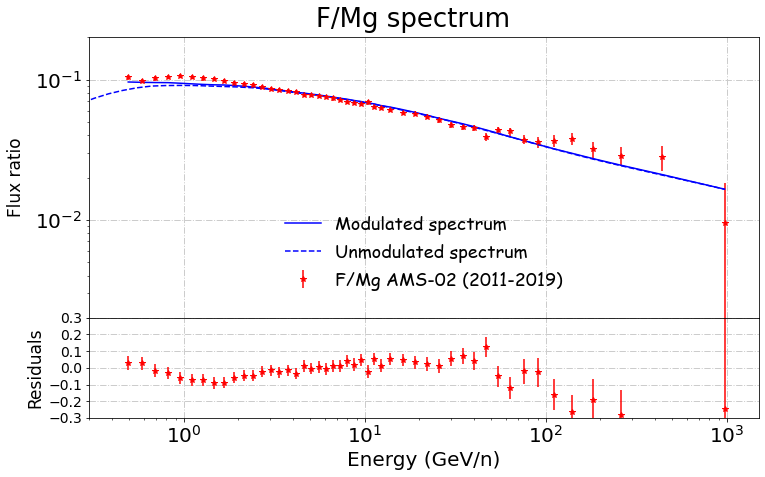

In [47]:
#F/Mg PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("F/Mg spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanF, fluxF/np.interp(EmeanF, EmeanMg, fluxMg), yerr = FMg_err, fmt='*r', label = "F/Mg AMS-02 (2011-2019)") #Real data

F19 = F_sc*np.interp(EmeanF, E, CR.modul(E, np.array(table_F19)[0], 9, 19, phi_ams))

mod0 = F19/np.interp(EmeanF, E, CR.modul(E, np.array(table_Mg)[0], 12, 24, phi_ams))
frame1.plot(EmeanF, mod0, "b-", label='Modulated spectrum')

mod1 = F_sc*np.array(table_F19)[0]/(np.array(table_Mg))[0]  #(np.array(table_F18) + np.array(table_F19)
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

frame1.set_ylabel(r"Flux ratio", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
#frame1.grid()
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.set_xlim(right = 1.5e3, left = 0.3)
frame1.set_ylim(bottom=2.e-3, top = 0.2)
frame1.yaxis.set_tick_params(labelsize = 20)


diff = np.array(mod0-fluxF/np.interp(EmeanF, E, CR.modul(E, np.array(table_Mg)[0], 12, 24, phi_ams)))
frame2.errorbar(EmeanF, diff/mod0, yerr = FMg_err/(fluxF/np.interp(EmeanF, EmeanMg, fluxMg)),  fmt= "r*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.3, bottom = -0.3) 
frame2.set_xlim(right = 1.5e3, left = 0.3)
#frame2.set_yticks([0, 0.1, 0.2, 0.3, 0.4]) # -0.3, -0.2,
frame2.set_yticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]) # 

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FMg_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FMg_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()

### F/Ne

In [48]:
FNe_err = np.sqrt((errfluxF/np.interp(EmeanF, EmeanNe, fluxNe))**2 + (errfluxF * (fluxF/(np.interp(EmeanF, EmeanNe, fluxNe))**2))**2)

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


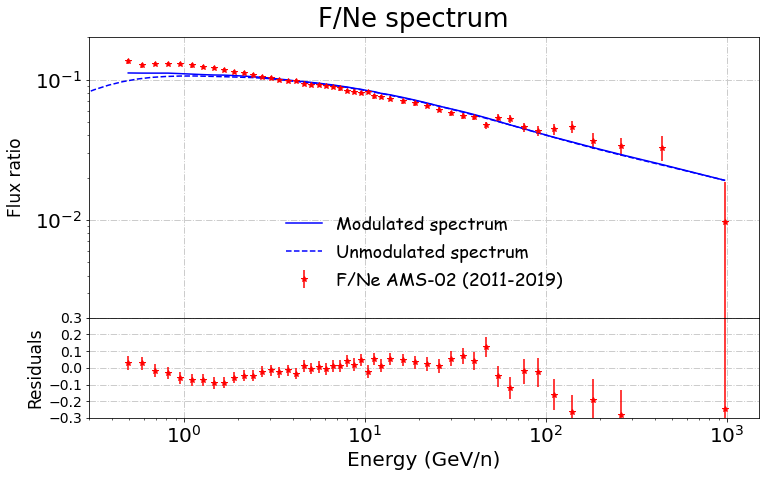

In [49]:
#F/Ne PLOT

fig1, (frame1,frame2)=plt.subplots(2, sharex='col', figsize=(12,7), gridspec_kw=gs_kw)
fig1.suptitle("F/Ne spectrum", fontsize = 26, y=0.94)
    
fig1.subplots_adjust(hspace=0.)
frame1.set_yscale('log')
frame1.set_xscale('log', nonposx = 'clip')

frame1.errorbar(EmeanF, fluxF/np.interp(EmeanF, EmeanNe, fluxNe), yerr = FNe_err, fmt='*r', label = "F/Ne AMS-02 (2011-2019)") #Real data

F19 = F_sc*np.interp(EmeanF, E, CR.modul(E, np.array(table_F19)[0], 9, 19, phi_ams))

mod0 = F19/np.interp(EmeanF, E, CR.modul(E, np.array(table_Ne)[0], 10, 20, phi_ams))
frame1.plot(EmeanF, mod0, "b-", label='Modulated spectrum')

mod1 = F_sc*np.array(table_F19)[0]/(np.array(table_Ne))[0]  #(np.array(table_F18) + np.array(table_F19)
frame1.plot(E[E<1e3], mod1[E<1e3], "b--", label='Unmodulated spectrum')

frame1.legend(prop={'family': 'fantasy', 'size': 18}, frameon = False, loc = 'lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1)

frame1.set_ylabel(r"Flux ratio", fontsize = 17, labelpad = 10)
frame1.tick_params(axis = 'y', labelsize=17)
#frame1.grid()
frame1.grid(color = '0.8', linestyle='-.', linewidth=1)
frame1.yaxis.set_tick_params(labelsize = 20)
frame1.set_ylim(bottom=2.e-3, top = 0.2)


diff = np.array(mod0-fluxF/np.interp(EmeanF, E, CR.modul(E, np.array(table_Ne)[0], 10, 20, phi_ams)))
frame2.errorbar(EmeanF, diff/mod0, yerr = FNe_err/(fluxF/np.interp(EmeanF, EmeanNe, fluxNe)),  fmt= "r*")

#frame1.set_ylim(bottom = 1.3e-2)
frame2.set_ylim(top = 0.3, bottom = -0.3) # -0.35
frame2.set_xlim(right = 1.5e3, left = 0.3)
#frame2.set_yticks([0, 0.1, 0.2, 0.3, 0.4]) # -0.3, -0.2,
frame2.set_yticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]) # 

frame2.yaxis.set_tick_params(labelsize = 14)
frame2.xaxis.set_tick_params(labelsize = 20)

plt.ylabel("Residuals", fontsize = 17)
plt.xlabel("Energy (GeV/n)", fontsize = 20)
frame2.grid(color = '0.8', linestyle='-.', linewidth=1)
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FNe_DRAGON2_CombWinkler.png')
plt.savefig('C:/Users/pedro/OneDrive/Escritorio/FNe_DRAGON2_CombWinkler.pdf')
plt.show()
plt.close()